# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('./9.0 hyundi_preprocessed.csv', index_col=0)

In [57]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [58]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [59]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(
    n_clusters=3,
    init="random",
    n_init=10,
    max_iter=1000,
    tol=1e-5,
    random_state=1234
)

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              2
1     14499  2016    25233              1
2     11399  2016    37877              1
3      6499  2016    23789              1
4     10199  2015    33177              1
...     ...   ...      ...            ...
4854  29995  2019     1567              2
4856   7830  2015    59508              0
4857   6830  2017    13810              2
4858  13994  2018    23313              1
4859  15999  2016    11472              2

[4592 rows x 4 columns]


/var/folders/cl/w3vvp74d6b95c0w799qxrb2w0000gn/T/ipykernel_24677/2784180288.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [60]:
# 클러스터 중심점 확인
centers = km.cluster_centers_  # 중심을 확인하는 코드를 넣어주세요

centers

array([[ 8073.2875    ,  2013.98      , 60897.8575    ],
       [10719.01463415,  2016.39756098, 30085.92560976],
       [14951.32876176,  2018.11912226,  9164.49568966]])

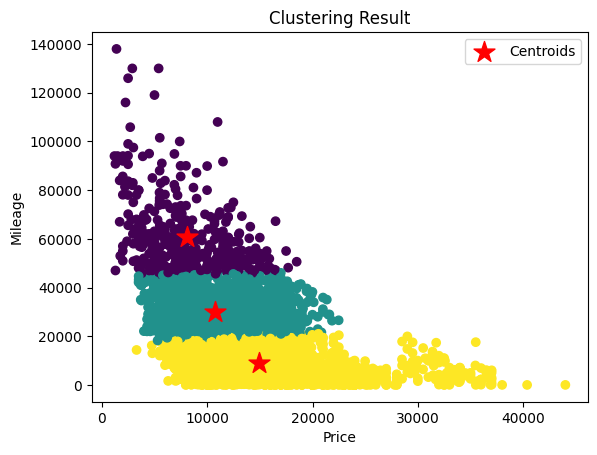

In [61]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =  df_new['price'] , y = df_new['mileage']   , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x=  centers[:,:1] , y= centers[:,2:] , marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

<Axes: >

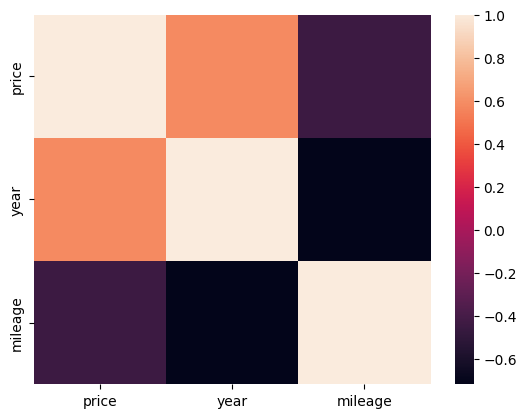

In [62]:
import seaborn as sns

sns.heatmap(df_new.iloc[:,:3].corr())

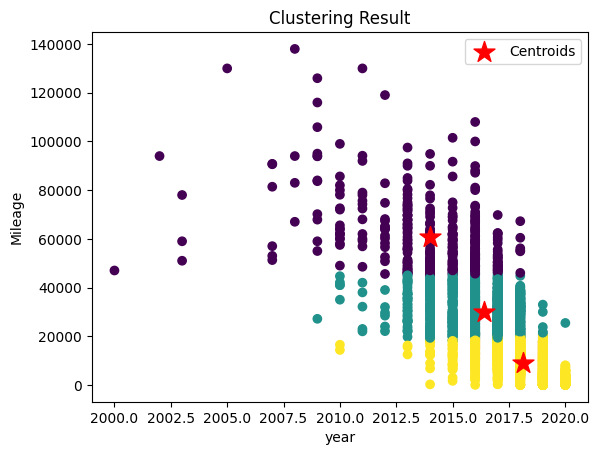

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x =  df_new['year'] , y = df_new['mileage']   , c=y_km, cmap='viridis')
plt.scatter(x=  centers[:,1:2] , y= centers[:,2:] , marker='*', s=250, color='red', label='Centroids')
plt.xlabel('year')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

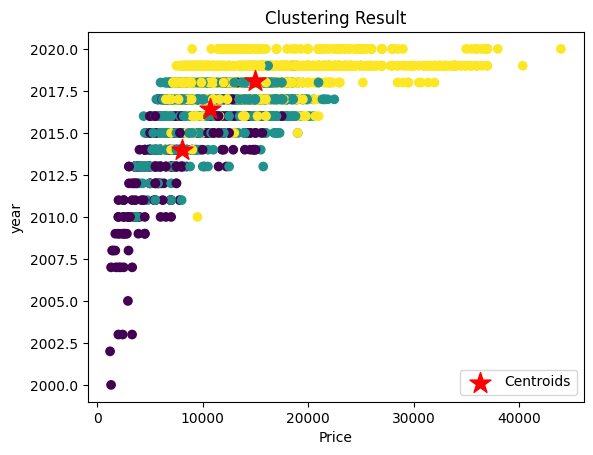

In [64]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =  df_new['price'] , y = df_new['year']   , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x=  centers[:,:1] , y= centers[:,1:2] , marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('year')
plt.title('Clustering Result')
plt.legend()
plt.show()

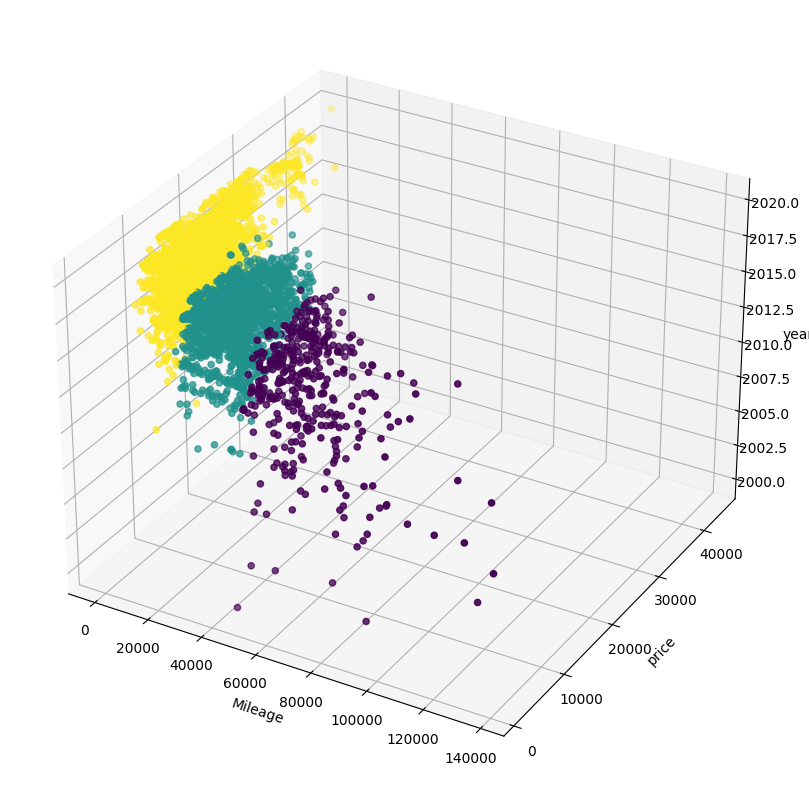

In [65]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_new['mileage'],df_new['price'],df_new['year'],c=df_new['cluster_label'])
plt.xlabel("Mileage")
plt.ylabel("price")
ax.set_zlabel("year")
plt.show()

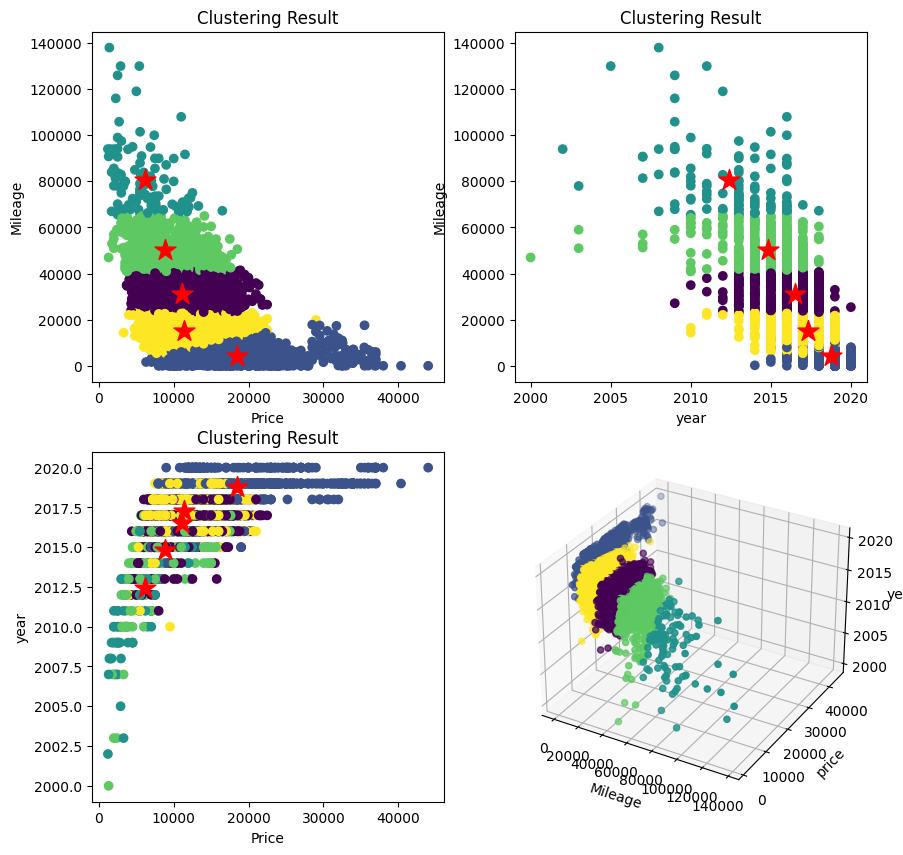

In [71]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(
    n_clusters=5,
    init="random",
    n_init=10,
    max_iter=1000,
    tol=1e-5,
    random_state=1234
)

two = df_new
y_km = km.fit_predict(two)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x =  two['price'] , y = two['mileage'], c=y_km, cmap='viridis') 
plt.scatter(x=  km.cluster_centers_[:,:1] , y= km.cluster_centers_[:,2:3] , marker='*', s=250, color='red', label='Centroids') 
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')

plt.subplot(2,2,2)
plt.scatter(x =  two['year'] , y = two['mileage'], c=y_km, cmap='viridis') 
plt.scatter(x=  km.cluster_centers_[:,1:2] , y= km.cluster_centers_[:,2:3] , marker='*', s=250, color='red', label='Centroids') 
plt.xlabel('year')
plt.ylabel('Mileage')
plt.title('Clustering Result')

plt.subplot(2,2,3)
plt.scatter(x =  two['price'] , y = two['year'], c=y_km, cmap='viridis') 
plt.scatter(x=  km.cluster_centers_[:,:1] , y= km.cluster_centers_[:,1:2] , marker='*', s=250, color='red', label='Centroids') 
plt.xlabel('Price')
plt.ylabel('year')
plt.title('Clustering Result')

ax = fig.add_subplot(224,projection='3d')
ax.scatter(two['mileage'],two['price'],two['year'],c=y_km)
plt.xlabel("Mileage")
plt.ylabel("price")
ax.set_zlabel("year")
plt.show()

# **분석**
```
Mileage, Price, Year값의 상관관계를 보니 Mileage와 Price, Year과 Mileage가 큰 상관관계를 가졌다.

Scatter로 시각화하여 데이터를 봤을 떄, 상관관계가 큰 두 칼럼의 군집화 결과가 뚜렷하게 보이는 것을 알 수 있었다.

하지만 상대적으로 관계성이 적은 Price와 Year의 scatter 그래프를 봤을 때는 경계가 뚜렷하게 보이지 않은것을 확인 할 수 있었다.

군집의 개수를 늘려 확인하니 Mileage의 크기가 군집화에 큰 영향을 줬다고 생각한다.
```